In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

There is a total of 349,655,790 rows with about 22GB of data.

In [2]:
file_name = '../data/transactions.csv'
chunksize = 10 ** 7
chunk_iter = pd.read_csv(file_name, chunksize=chunksize)

In [3]:
chunk1 = chunk_iter.next()
chunk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 11 columns):
id                  int64
chain               int64
dept                int64
category            int64
company             int64
brand               int64
date                object
productsize         float64
productmeasure      object
purchasequantity    int64
purchaseamount      float64
dtypes: float64(2), int64(7), object(2)
memory usage: 839.2+ MB


In [4]:
chunk1.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,86246,205,7,707,1078778070,12564,2012-03-02,12.0,OZ,1,7.59
1,86246,205,63,6319,107654575,17876,2012-03-02,64.0,OZ,1,1.59
2,86246,205,97,9753,1022027929,0,2012-03-02,1.0,CT,1,5.99
3,86246,205,25,2509,107996777,31373,2012-03-02,16.0,OZ,1,1.99
4,86246,205,55,5555,107684070,32094,2012-03-02,16.0,OZ,2,10.38


In [5]:
chunk1.tail()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
9999995,126082871,18,36,3634,1078616272,7237,2012-08-31,32.0,OZ,2,3.00
9999996,126082871,18,6,610,107084777,11910,2012-08-31,16.0,OZ,1,2.29
9999997,126082871,18,56,5607,102113020,10786,2012-08-31,16.0,OZ,1,3.49
9999998,126082871,18,63,6321,107989373,29344,2012-08-31,10.0,OZ,1,3.99
9999999,126082871,18,33,3305,102840020,18584,2012-08-31,10.0,OZ,1,3.00


In [6]:
chunk1.describe()

,id,chain,dept,category,company,brand,productsize,purchasequantity,purchaseamount
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.111775e+08,2.631343e+01,4.166467e+01,4.180254e+03,2.202853e+08,1.593180e+04,2.834404e+01,1.380535e+00,4.572598e+00
std,1.974703e+07,3.059072e+01,2.789194e+01,2.791806e+03,4.418062e+08,1.509730e+04,5.072834e+01,1.167092e+00,6.496406e+00
min,8.624600e+04,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,0.000000e+00,0.000000e+00,-2.800000e+01,-2.664200e+02
25%,1.046491e+08,1.400000e+01,1.800000e+01,1.890000e+03,1.021130e+08,7.848000e+03,7.500000e+00,1.000000e+00,2.290000e+00
50%,1.209127e+08,1.500000e+01,3.600000e+01,3.630000e+03,1.040000e+08,1.329100e+04,1.420000e+01,1.000000e+00,3.490000e+00
75%,1.238009e+08,1.800000e+01,6.000000e+01,6.012000e+03,1.073041e+08,1.711700e+04,2.400000e+01,1.000000e+00,5.490000e+00
max,1.260829e+08,2.170000e+02,9.900000e+01,9.999000e+03,1.099874e+10,1.086200e+05,4.000000e+03,3.840000e+02,3.000000e+03


9,606 unique customers in this chunk.

In [7]:
chunk1['id'].unique().shape

(9606,)

## Top department

In [8]:
dept_count = chunk1.groupby('dept')['dept'].count().sort_values(ascending=False)
(dept_count / dept_count.sum()).head(15)

dept
9     0.086751
63    0.077805
99    0.054898
36    0.050704
33    0.042609
56    0.040353
58    0.037662
5     0.035145
26    0.034572
8     0.028861
51    0.028739
64    0.025441
4     0.022438
97    0.022086
21    0.021762
Name: dept, dtype: float64

## Top category

In [9]:
category_count = chunk1.groupby('category')['category'].count().sort_values(ascending=False)
(category_count / category_count.sum()).head(15)

category
907     0.033090
6315    0.028687
501     0.020184
9909    0.019505
9908    0.017165
9753    0.016590
9904    0.016198
902     0.015051
6320    0.013909
5823    0.010413
6401    0.010006
901     0.009711
3303    0.009009
9609    0.008816
3611    0.007887
Name: category, dtype: float64

## Top chains

In [10]:
chain_count = chunk1.groupby('chain')['chain'].count().sort_values(ascending=False)
(chain_count / chain_count.sum()).head(15)

chain
15     0.239584
18     0.175876
4      0.155897
17     0.096828
95     0.087274
20     0.069154
14     0.068661
88     0.065687
3      0.036765
205    0.002470
192    0.000859
58     0.000314
46     0.000299
217    0.000253
2      0.000080
Name: chain, dtype: float64

## Top companies

In [11]:
company_count = chunk1.groupby('company')['company'].count().sort_values(ascending=False)
(company_count / company_count.sum()).head(15)

company
102113020    0.207167
107989373    0.033782
102840020    0.021571
101600010    0.015470
104400040    0.014116
103700030    0.014077
103800030    0.011840
104900040    0.011792
102100020    0.011725
10000        0.011114
105100050    0.010110
101200010    0.009802
107127979    0.009223
103400030    0.008598
104470040    0.008583
Name: company, dtype: float64

## Top brands

In [12]:
brand_count = chunk1.groupby('brand')['brand'].count().sort_values(ascending=False)
(brand_count / brand_count.sum()).head(15)

brand
15704    0.124630
10786    0.062087
0        0.018323
12908    0.015449
30626    0.013390
33170    0.012552
6732     0.009223
16397    0.009043
88199    0.008816
9886     0.007436
13310    0.006579
29344    0.006077
2820     0.005696
20230    0.005490
5278     0.005481
Name: brand, dtype: float64

## Time series plot.
Number of transactions on each date.

In [13]:
date_trans_count = chunk1.groupby('date')['date'].count()

In [14]:
print min(date_trans_count.index)
print max(date_trans_count.index)

2012-03-02
2013-07-27


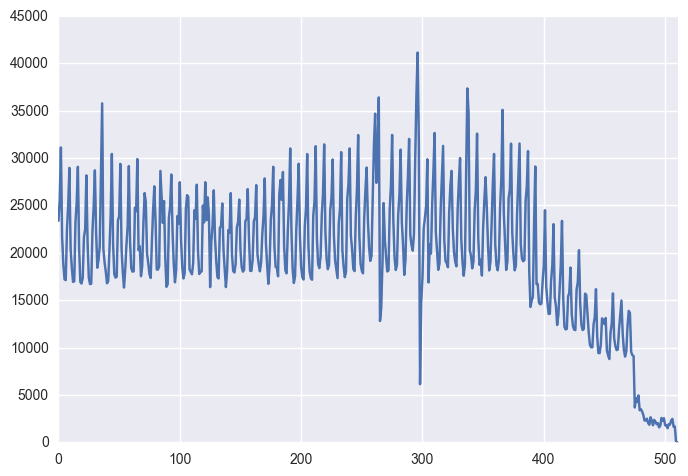

In [15]:
sns.tsplot(date_trans_count)
sns.plt.show()

## Number of transactions per user

In [16]:
id_counts = chunk1.groupby('id')['id'].count()
id_counts.value_counts().sort_values(ascending=False).head(15)

768     14
474     14
554     14
762     14
565     14
1160    13
464     13
488     13
248     13
310     13
525     13
1126    12
510     12
529     12
276     12
Name: id, dtype: int64

In [17]:
id_counts.describe()

count     9606.000000
mean      1041.016032
std        709.232351
min          7.000000
25%        522.250000
50%        895.000000
75%       1411.000000
max      12609.000000
Name: id, dtype: float64

Heavily skewed to the right. Will have to remove or cap this feature.

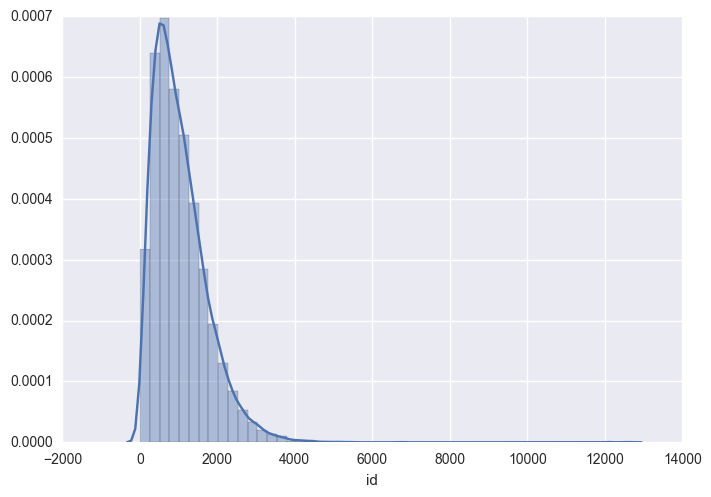

In [18]:
sns.distplot(id_counts)
sns.plt.show()

## Train history data

In [19]:
train = pd.read_csv('../data/trainHistory.csv')
offers = pd.read_csv('../data/offers.csv')

In [20]:
train = pd.merge(train, offers, how='left', on=['offer'])

In [21]:
# Merge the number of transactions per customer to the train data
id_counts_df = pd.DataFrame(id_counts)
id_counts_df.columns = ['counts']
id_counts_df.reset_index(inplace=True)
train = pd.merge(train, id_counts_df, how='left', on='id')

In [22]:
# Reencode the target variable
train['repeater'] = np.where(train['repeater'] == 't', '1', '0')

In [23]:
train.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,offervalue,brand,counts
0,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,2.00,3718,12609.0
1,86252,205,1197502,34,16,1,2013-03-27,3203,1,106414464,0.75,13474,12087.0
2,12682470,18,1197502,11,0,0,2013-03-28,3203,1,106414464,0.75,13474,806.0
3,12996040,15,1197502,9,0,0,2013-03-25,3203,1,106414464,0.75,13474,326.0
4,13089312,15,1204821,9,0,0,2013-04-01,5619,1,107717272,1.50,102504,1218.0


About 27% of customers in the training data have used the offer.

In [24]:
train['repeater'].mean()

inf

37 total offers in the offers CSV file. There are 24 unique offers in the training set and 13 unique offers in the testing set.

In [25]:
print len(offers['offer'].unique())
print len(train['offer'].unique())

37
24


Customers with more transactions are more likely to accept the offer.

In [26]:
train.groupby('repeater')['counts'].mean()

repeater
0     908.848820
1    1100.929708
Name: counts, dtype: float64

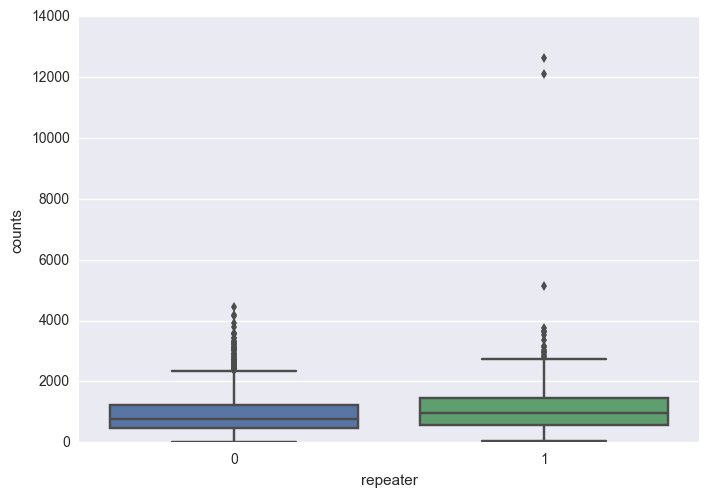

In [27]:
sns.boxplot(x='repeater', y='counts', data=train)
sns.plt.show()